<a href="https://colab.research.google.com/github/tejaswiniii-11/Team33_Sustainability/blob/main/hackathon_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

In [ ]:
folder_path = "/content/wind_power_data"

In [ ]:
wind_power_files = [
    "air_temperature_2019.xlsx", "air_temperature_2020.xlsx", "air_temperature_2021.xlsx", "air_temperature_2022.xlsx", "air_temperature_2023.xlsx",
    "power_gen_2019.xlsx", "power_gen_2020.xlsx", "power_gen_2021.xlsx", "power_gen_2022.xlsx", "power_gen_2023.xlsx",
    "pressure_2019.xlsx", "pressure_2020.xlsx", "pressure_2021.xlsx", "pressure_2022.xlsx", "pressure_2023.xlsx",
    "wind_speed_2019.xlsx", "wind_speed_2020.xlsx", "wind_speed_2021.xlsx", "wind_speed_2022.xlsx", "wind_speed_2023.xlsx"
]


In [ ]:
import pandas as pd
import os

def analyze_wind_power_dataset(files):
    for file in files:
        print("Analyzing file:", file)
        df = pd.read_csv(file)
        print("File:", os.path.basename(file))
        print(df.info())
        print("Shape:", df.shape)
        print("Columns:", df.columns.tolist())
        print("Missing Values:")
        print(df.isnull().sum())
        print("Basic Statistics:")
        print(df.describe())
        print("\n")

In [ ]:
analyze_wind_power_dataset(wind_power_files)


Analyzing file: air_temperature_2019.xlsx
Shape: (8759, 2)
Columns: ['DateTime', 'Air temperature | (°C)']
Missing Values:
DateTime                  0
Air temperature | (°C)    0
dtype: int64
Basic Statistics:
                            DateTime  Air temperature | (°C)
count                           8759             8759.000000
mean   2019-07-02 12:00:00.005765376               16.135669
min              2019-01-01 01:00:00               -9.060000
25%              2019-04-02 06:30:00                8.387000
50%              2019-07-02 12:00:00               17.536000
75%              2019-10-01 17:30:00               23.716500
max              2019-12-31 23:00:00               38.340000
std                              NaN               10.016988


Analyzing file: air_temperature_2020.xlsx
Shape: (8784, 2)
Columns: ['DateTime', 'Air temperature | (°C)']
Missing Values:
DateTime                  0
Air temperature | (°C)    0
dtype: int64
Basic Statistics:
                  DateTime  A

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def visualize_data(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=20, kde=True)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()


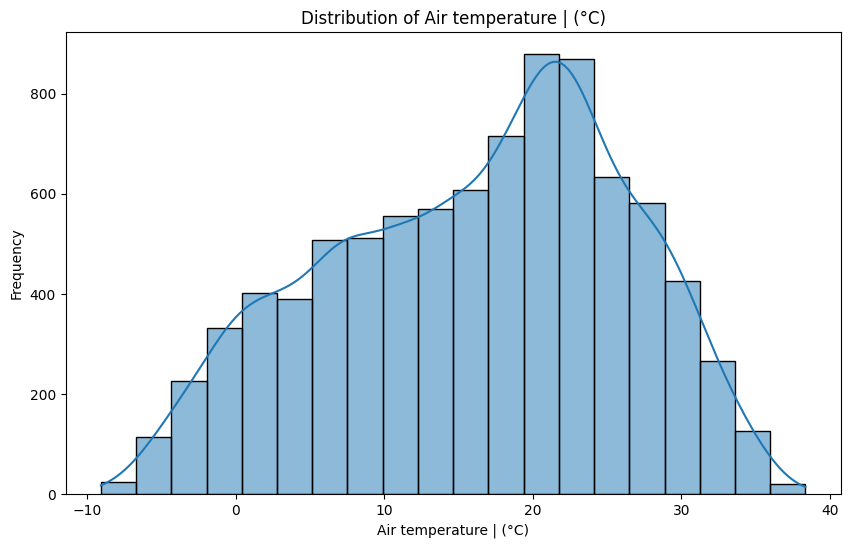

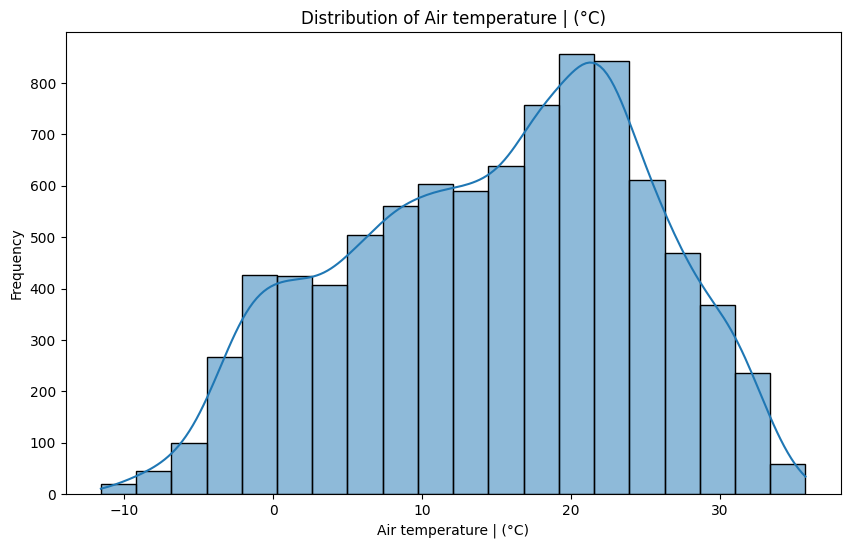

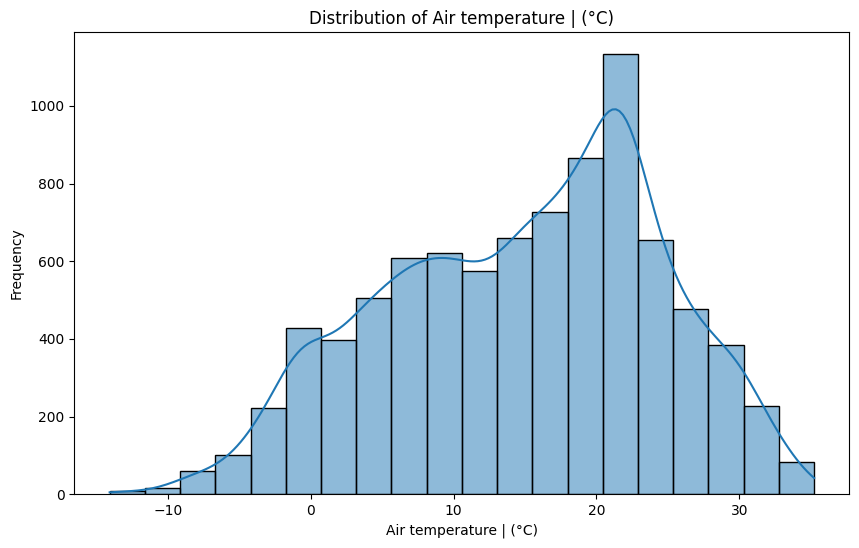

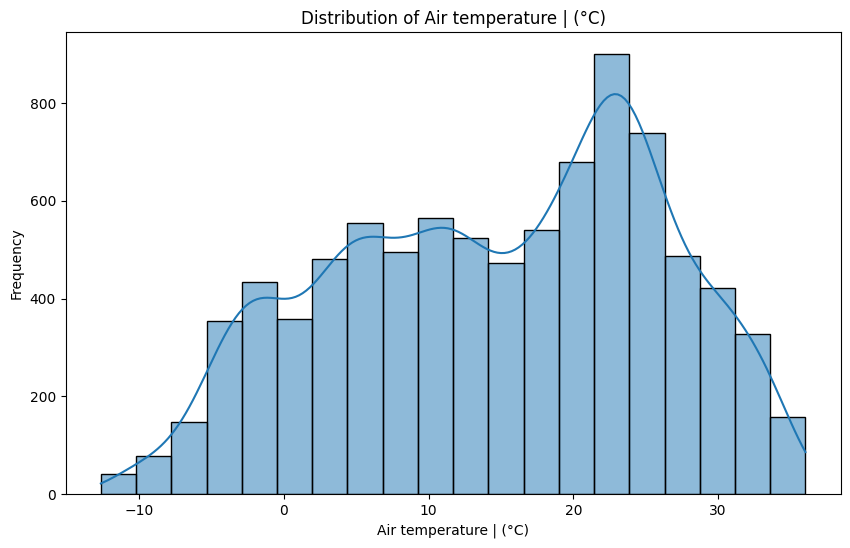

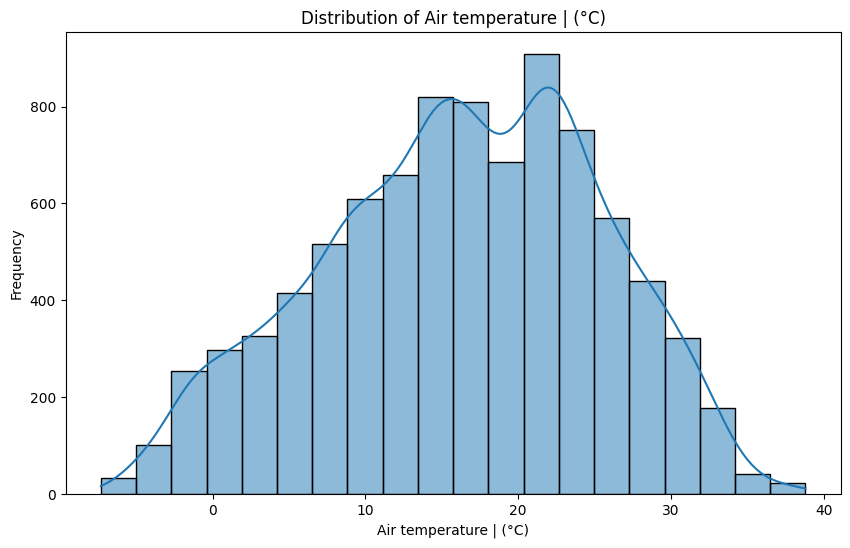

In [ ]:
for year in range(2019, 2024):
    file_name = f"air_temperature_{year}.xlsx"
    df = pd.read_excel(os.path.join(folder_path, file_name))
    visualize_data(df, 'Air temperature | (°C)')

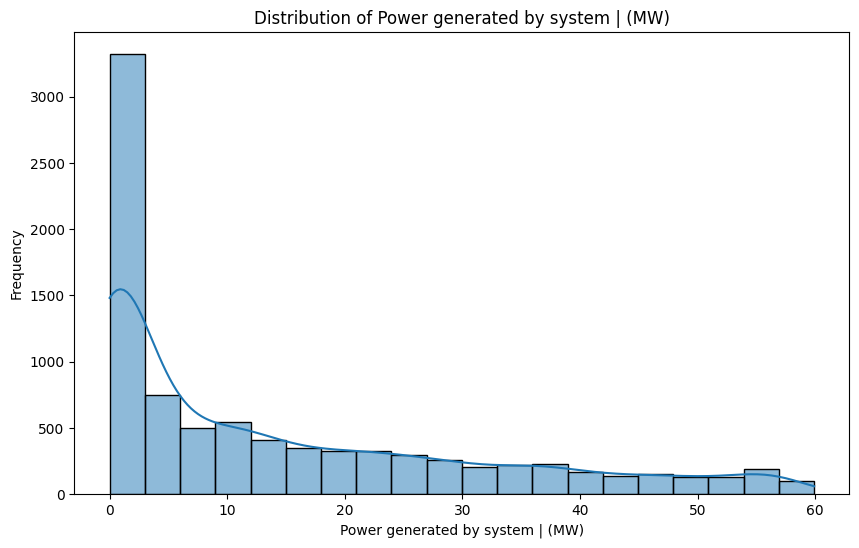

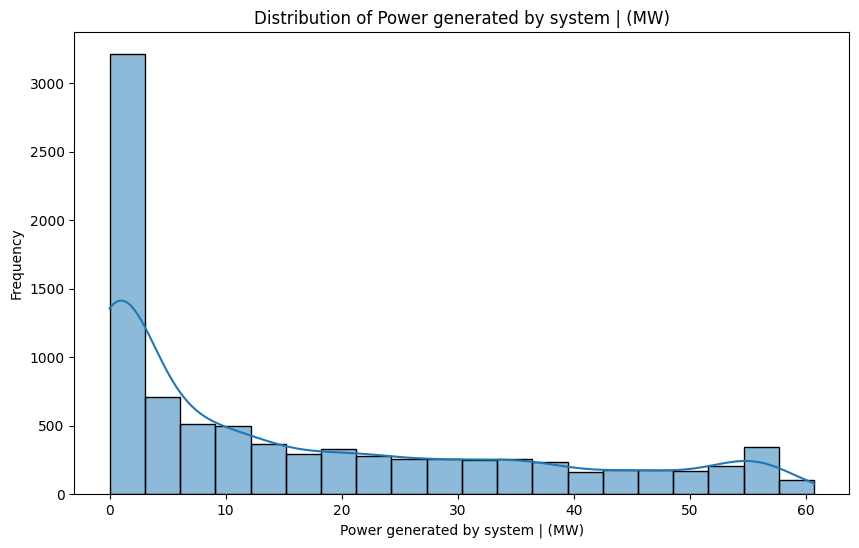

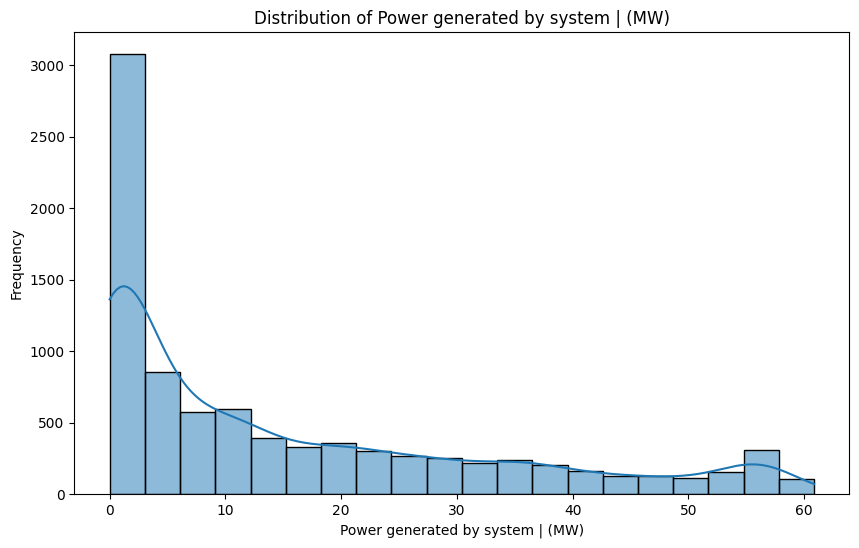

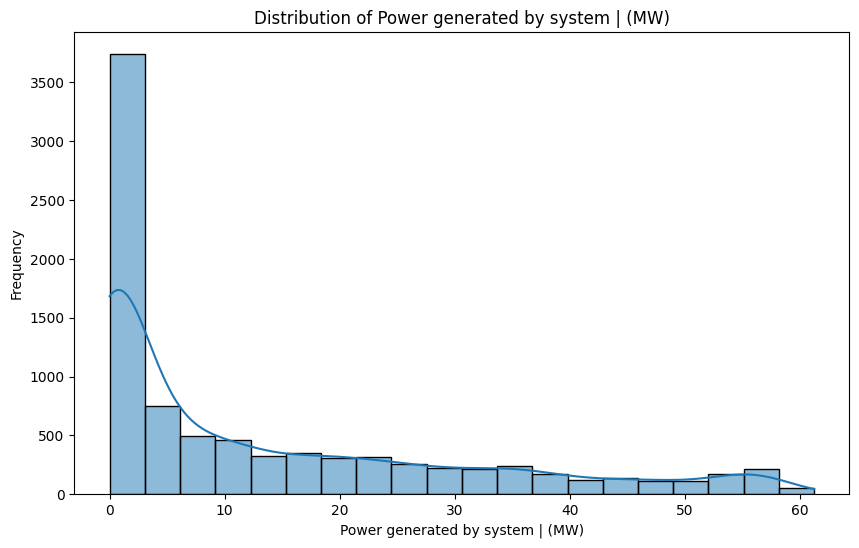

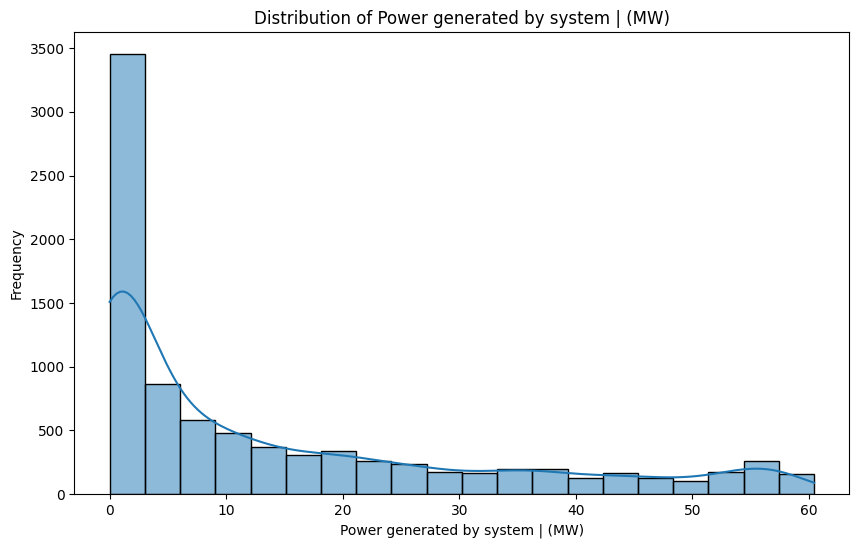

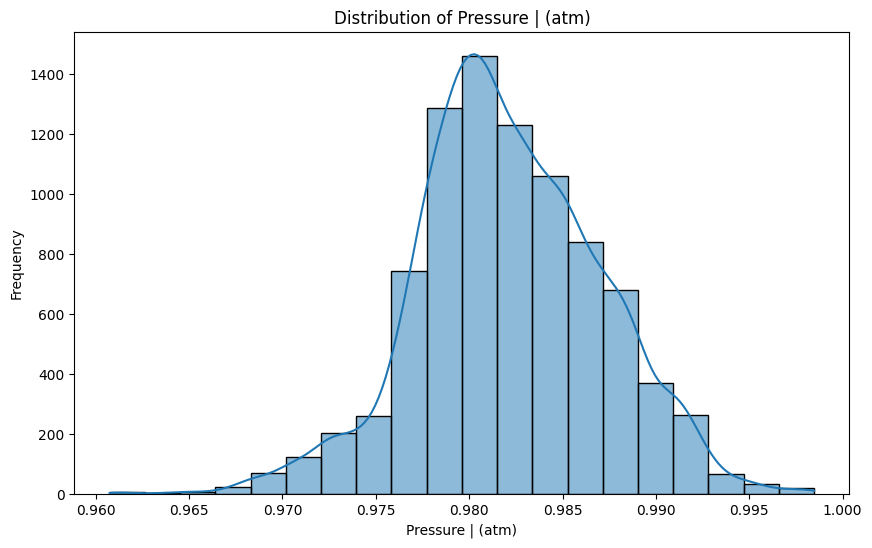

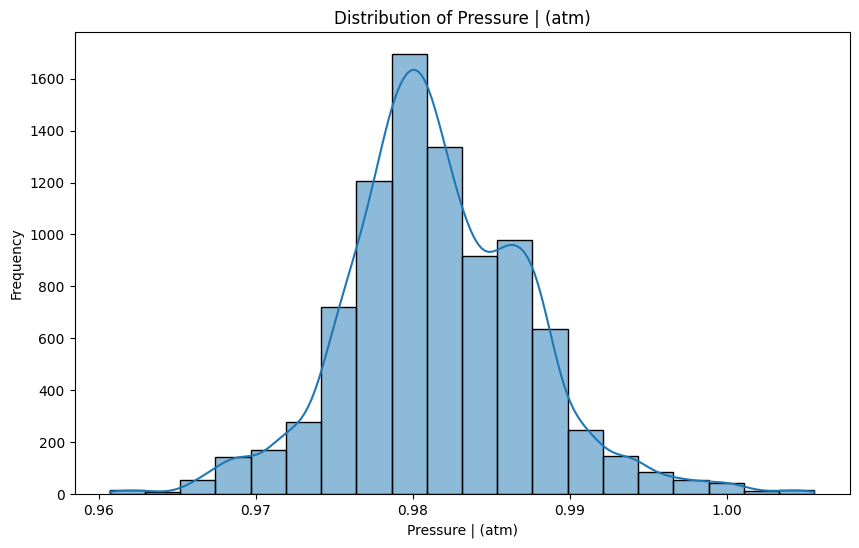

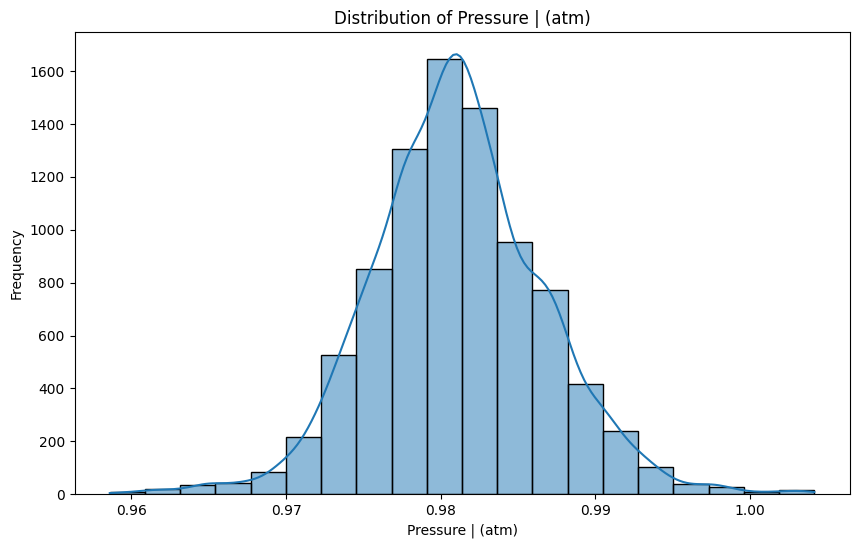

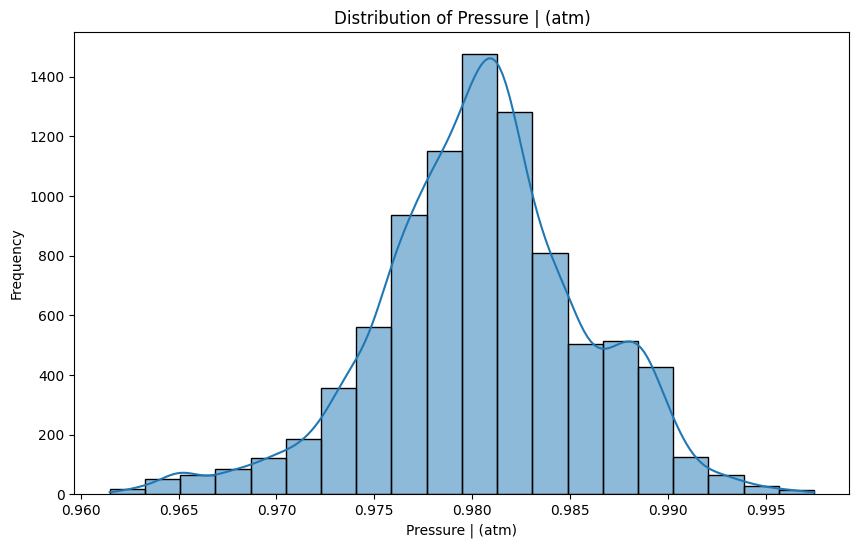

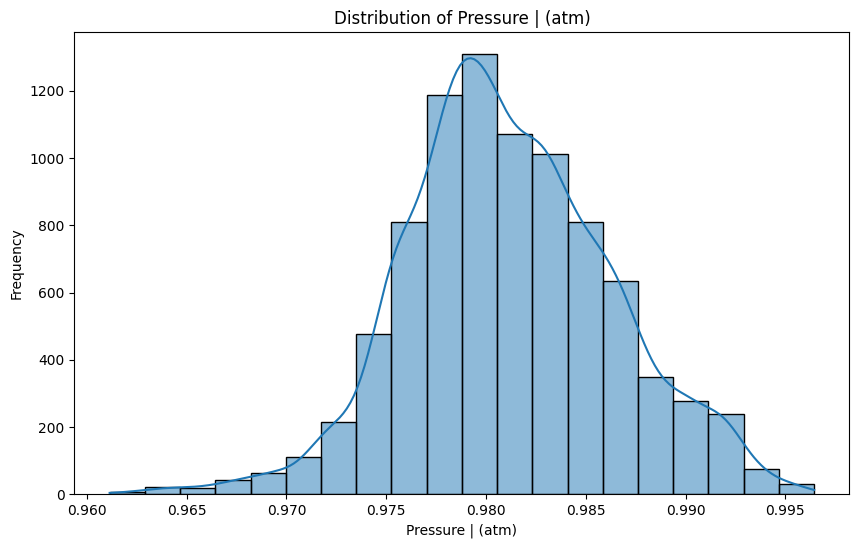

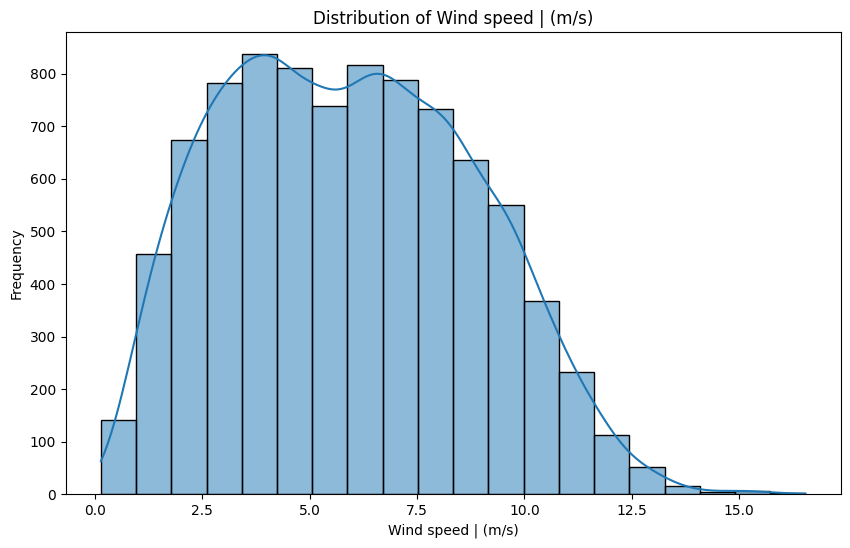

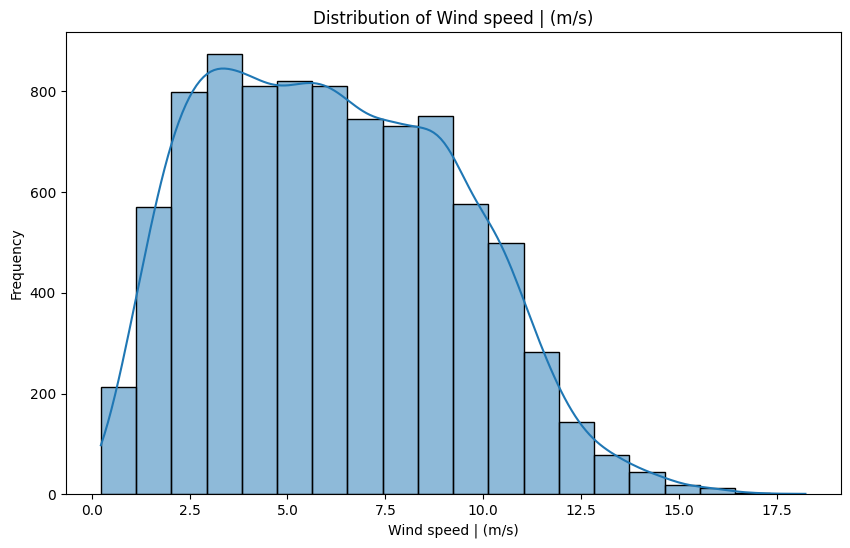

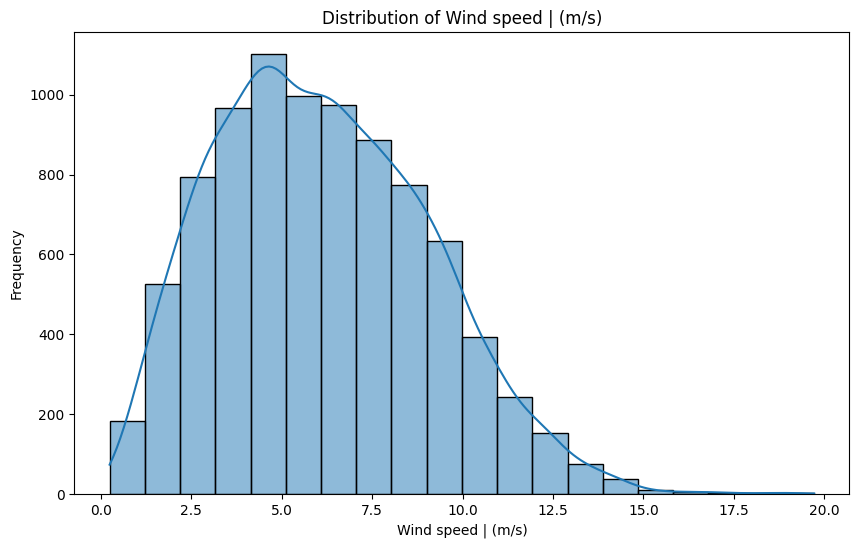

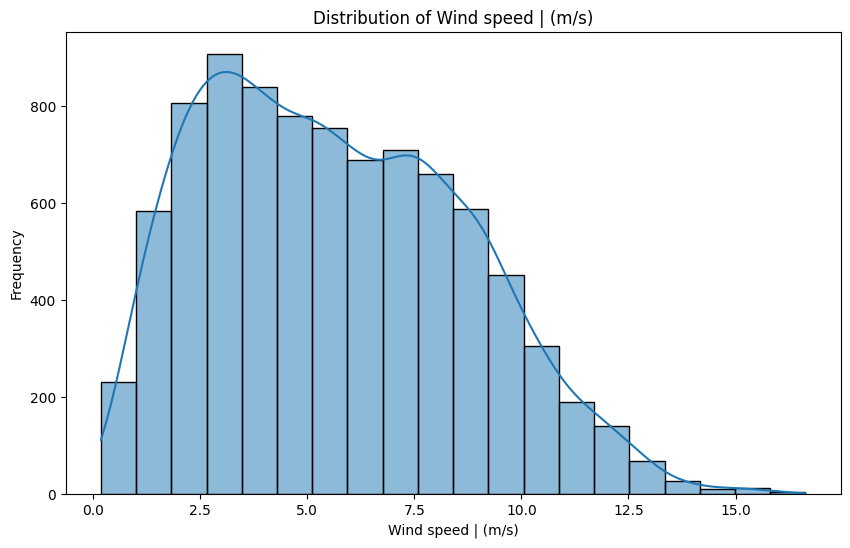

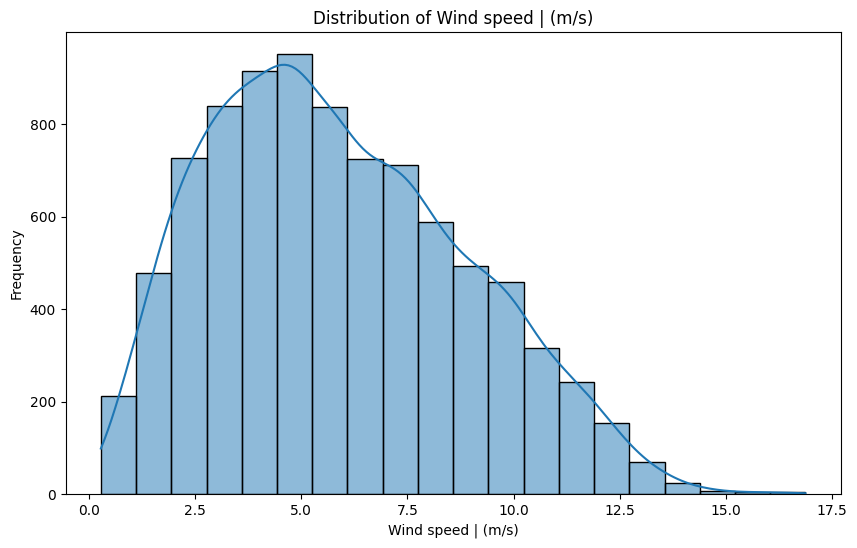

In [ ]:
for year in range(2019, 2024):
    file_name = f"power_gen_{year}.xlsx"
    df = pd.read_excel(os.path.join(folder_path, file_name))
    visualize_data(df, 'Power generated by system | (MW)')

# Analyzing pressure data
for year in range(2019, 2024):
    file_name = f"pressure_{year}.xlsx"
    df = pd.read_excel(os.path.join(folder_path, file_name))
    visualize_data(df, 'Pressure | (atm)')

# Analyzing wind speed data
for year in range(2019, 2024):
    file_name = f"wind_speed_{year}.xlsx"
    df = pd.read_excel(os.path.join(folder_path, file_name))
    visualize_data(df, 'Wind speed | (m/s)')

In [ ]:



def analyze_wind_power_dataset(files):
    for file in files:
        print("Analyzing file:", file)
        if file.endswith(".xlsx"):
            df = pd.read_excel(os.path.join(folder_path, file))
        elif file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder_path, file))

        # Check data types and consistency of DateTime columns
        if 'DateTime' in df.columns:
            print("Data Types:")
            print(df.dtypes)
            print("\n")
            print("Checking consistency of DateTime column:")
            print("Minimum DateTime:", df['DateTime'].min())
            print("Maximum DateTime:", df['DateTime'].max())
            print("\n")
        else:
            print("DateTime column not found in the dataset.")

        print("Shape:", df.shape)
        print("Columns:", df.columns.tolist())
        print("Missing Values:")
        print(df.isnull().sum())
        print("Basic Statistics:")
        print(df.describe())
        print("\n")

# Execute the function
analyze_wind_power_dataset(wind_power_files)


Analyzing file: air_temperature_2019.xlsx
Data Types:
DateTime                  datetime64[ns]
Air temperature | (°C)           float64
dtype: object


Checking consistency of DateTime column:
Minimum DateTime: 2019-01-01 01:00:00
Maximum DateTime: 2019-12-31 23:00:00


Shape: (8759, 2)
Columns: ['DateTime', 'Air temperature | (°C)']
Missing Values:
DateTime                  0
Air temperature | (°C)    0
dtype: int64
Basic Statistics:
                            DateTime  Air temperature | (°C)
count                           8759             8759.000000
mean   2019-07-02 12:00:00.005765376               16.135669
min              2019-01-01 01:00:00               -9.060000
25%              2019-04-02 06:30:00                8.387000
50%              2019-07-02 12:00:00               17.536000
75%              2019-10-01 17:30:00               23.716500
max              2019-12-31 23:00:00               38.340000
std                              NaN               10.016988


Analyzing 

In [ ]:
import os
import pandas as pd

def merge_wind_power_dataset(files, folder_path):
    merged_data = None
    for file in files:
        print("Merging file:", file)
        if file.endswith(".xlsx") or file.endswith(".csv"):
            df = pd.read_excel(os.path.join(folder_path, file)) if file.endswith(".xlsx") else pd.read_csv(os.path.join(folder_path, file))
            if merged_data is None:
                merged_data = df
            else:
                merged_data = pd.merge(merged_data, df, on='DateTime', how='outer', suffixes=('', '_'+os.path.splitext(os.path.basename(file))[0])) # Add suffix based on file name
        else:
            print("Unsupported file format:", file)
    return merged_data

# Execute the merging function
merged_wind_power_data = merge_wind_power_dataset(wind_power_files, folder_path)

# Display first few rows to verify
print(merged_wind_power_data.head())

# Save the merged dataset to a file
merged_wind_power_data.to_csv('merged_wind_power_data.csv', index=False)


Merging file: air_temperature_2019.xlsx
Merging file: air_temperature_2020.xlsx
Merging file: air_temperature_2021.xlsx
Merging file: air_temperature_2022.xlsx
Merging file: air_temperature_2023.xlsx
Merging file: power_gen_2019.xlsx
Merging file: power_gen_2020.xlsx
Merging file: power_gen_2021.xlsx
Merging file: power_gen_2022.xlsx
Merging file: power_gen_2023.xlsx
Merging file: pressure_2019.xlsx
Merging file: pressure_2020.xlsx
Merging file: pressure_2021.xlsx
Merging file: pressure_2022.xlsx
Merging file: pressure_2023.xlsx
Merging file: wind_speed_2019.xlsx
Merging file: wind_speed_2020.xlsx
Merging file: wind_speed_2021.xlsx
Merging file: wind_speed_2022.xlsx
Merging file: wind_speed_2023.xlsx
                 DateTime  Air temperature | (°C)  \
0 2019-01-01 01:00:00.000                  10.926   
1 2019-01-01 02:00:00.000                   9.919   
2 2019-01-01 03:00:00.005                   8.567   
3 2019-01-01 04:00:00.010                   7.877   
4 2019-01-01 05:00:00.015

In [ ]:
import os
import pandas as pd

folder_path = "/content/wind_power_data"
wind_power_files = [
    "air_temperature_2019.xlsx", "air_temperature_2020.xlsx", "air_temperature_2021.xlsx", "air_temperature_2022.xlsx", "air_temperature_2023.xlsx",
    "power_gen_2019.xlsx", "power_gen_2020.xlsx", "power_gen_2021.xlsx", "power_gen_2022.xlsx", "power_gen_2023.xlsx",
    "pressure_2019.xlsx", "pressure_2020.xlsx", "pressure_2021.xlsx", "pressure_2022.xlsx", "pressure_2023.xlsx",
    "wind_speed_2019.xlsx", "wind_speed_2020.xlsx", "wind_speed_2021.xlsx", "wind_speed_2022.xlsx", "wind_speed_2023.xlsx"
]

dfs = []
for file in wind_power_files:
    if file.endswith(".xlsx"):
        df = pd.read_excel(os.path.join(folder_path, file))
        dfs.append(df)
    elif file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, file))
        dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
merged_df = merged_df.sort_values('DateTime')

# Save the merged dataset to a file
output_file = "merged_wind_power_data.xlsx"
merged_df.to_excel(os.path.join(folder_path, output_file), index=False)
print(f"Merged dataset saved to: {os.path.join(folder_path, output_file)}")

Merged dataset saved to: /content/wind_power_data/merged_wind_power_data.xlsx


In [ ]:
import pandas as pd

# Define the list of files
wind_power_files = [
    "air_temperature_2019.xlsx", "air_temperature_2020.xlsx", "air_temperature_2021.xlsx", "air_temperature_2022.xlsx", "air_temperature_2023.xlsx",
    "power_gen_2019.xlsx", "power_gen_2020.xlsx", "power_gen_2021.xlsx", "power_gen_2022.xlsx", "power_gen_2023.xlsx",
    "pressure_2019.xlsx", "pressure_2020.xlsx", "pressure_2021.xlsx", "pressure_2022.xlsx", "pressure_2023.xlsx",
    "wind_speed_2019.xlsx", "wind_speed_2020.xlsx", "wind_speed_2021.xlsx", "wind_speed_2022.xlsx", "wind_speed_2023.xlsx"
]

# Define the path to the folder
folder_path = "wind_power_data/"

# Function to read and display head and first 5 rows of each file
def read_and_display(file_name):
    file_path = folder_path + file_name
    print(f"File: {file_name}")
    try:
        df = pd.read_excel(file_path)
        print("Head:")
        print(df.head())
        print("First 5 rows:")
        print(df[:5])
        print()
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

# Iterate over each file and display its content
for file_name in wind_power_files:
    read_and_display(file_name)


File: air_temperature_2019.xlsx
Head:
                 DateTime  Air temperature | (°C)
0 2019-01-01 01:00:00.000                  10.926
1 2019-01-01 02:00:00.000                   9.919
2 2019-01-01 03:00:00.005                   8.567
3 2019-01-01 04:00:00.010                   7.877
4 2019-01-01 05:00:00.015                   7.259
First 5 rows:
                 DateTime  Air temperature | (°C)
0 2019-01-01 01:00:00.000                  10.926
1 2019-01-01 02:00:00.000                   9.919
2 2019-01-01 03:00:00.005                   8.567
3 2019-01-01 04:00:00.010                   7.877
4 2019-01-01 05:00:00.015                   7.259

File: air_temperature_2020.xlsx
Head:
             DateTime  Air temperature | (°C)
0 2020-01-01 00:00:00                   5.096
1 2020-01-01 01:00:00                   4.738
2 2020-01-01 02:00:00                   4.622
3 2020-01-01 03:00:00                   3.910
4 2020-01-01 04:00:00                   4.928
First 5 rows:
             DateTi

In [ ]:
import pandas as pd

# Define the list of files
wind_power_files = [
    "air_temperature_2019.xlsx", "air_temperature_2020.xlsx", "air_temperature_2021.xlsx",
    "air_temperature_2022.xlsx", "air_temperature_2023.xlsx",
    "power_gen_2019.xlsx", "power_gen_2020.xlsx", "power_gen_2021.xlsx",
    "power_gen_2022.xlsx", "power_gen_2023.xlsx",
    "pressure_2019.xlsx", "pressure_2020.xlsx", "pressure_2021.xlsx",
    "pressure_2022.xlsx", "pressure_2023.xlsx",
    "wind_speed_2019.xlsx", "wind_speed_2020.xlsx", "wind_speed_2021.xlsx",
    "wind_speed_2022.xlsx", "wind_speed_2023.xlsx"
]

# Define the path to the folder
folder_path = "wind_power_data/"

# Read and merge the datasets
air_temperature_df = pd.DataFrame()
pressure_df = pd.DataFrame()
power_df = pd.DataFrame()
speed_df = pd.DataFrame()

for file_name in wind_power_files:
    file_path = folder_path + file_name
    try:
        if file_name.startswith("air_temperature_"):
            temp_df = pd.read_excel(file_path)
            air_temperature_df = pd.concat([air_temperature_df, temp_df], ignore_index=True)
        elif file_name.startswith("power_gen_"):
            power_df = pd.concat([power_df, pd.read_excel(file_path)], ignore_index=True)
        elif file_name.startswith("pressure_"):
            pressure_df = pd.concat([pressure_df, pd.read_excel(file_path)], ignore_index=True)
        elif file_name.startswith("wind_speed_"):
            speed_df = pd.concat([speed_df, pd.read_excel(file_path)], ignore_index=True)
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

# Save the merged DataFrames to Excel files
air_temperature_df.to_excel("air_temperature.xlsx", index=False)
pressure_df.to_excel("pressure.xlsx", index=False)
power_df.to_excel("power.xlsx", index=False)
speed_df.to_excel("wind_speed.xlsx", index=False)

# Display the merged DataFrames
print("Air Temperature DataFrame:")
print(air_temperature_df.head())
print("\nPressure DataFrame:")
print(pressure_df.head())
print("\nPower DataFrame:")
print(power_df.head())
print("\nSpeed DataFrame:")
print(speed_df.head())

Air Temperature DataFrame:
                 DateTime  Air temperature | (°C)
0 2019-01-01 01:00:00.000                  10.926
1 2019-01-01 02:00:00.000                   9.919
2 2019-01-01 03:00:00.005                   8.567
3 2019-01-01 04:00:00.010                   7.877
4 2019-01-01 05:00:00.015                   7.259

Pressure DataFrame:
                 DateTime  Pressure | (atm)
0 2019-01-01 01:00:00.000          0.979103
1 2019-01-01 02:00:00.000          0.979566
2 2019-01-01 03:00:00.005          0.979937
3 2019-01-01 04:00:00.010          0.980053
4 2019-01-01 05:00:00.015          0.979867

Power DataFrame:
                 DateTime  Power generated by system | (MW)
0 2019-01-01 01:00:00.000                           33.6881
1 2019-01-01 02:00:00.000                           37.2619
2 2019-01-01 03:00:00.005                           30.5029
3 2019-01-01 04:00:00.010                           28.4192
4 2019-01-01 05:00:00.015                           27.3703

Speed Dat

In [ ]:
import pandas as pd

# Read the merged files
air_temperature_df = pd.read_excel("air_temperature.xlsx")
pressure_df = pd.read_excel("pressure.xlsx")
power_df = pd.read_excel("power.xlsx")
speed_df = pd.read_excel("wind_speed.xlsx")

# Merge the DataFrames on the 'DateTime' column
merged_df = pd.merge(air_temperature_df, pressure_df, on='DateTime', how='inner')
merged_df = pd.merge(merged_df, power_df, on='DateTime', how='inner')
merged_df = pd.merge(merged_df, speed_df, on='DateTime', how='inner')

# Save the merged DataFrame to an Excel file
merged_df.to_excel("merged_data.xlsx", index=False)

# Display the merged DataFrame
print(merged_df.head())

                 DateTime  Air temperature | (°C)  Pressure | (atm)  \
0 2019-01-01 01:00:00.000                  10.926          0.979103   
1 2019-01-01 02:00:00.000                   9.919          0.979566   
2 2019-01-01 03:00:00.005                   8.567          0.979937   
3 2019-01-01 04:00:00.010                   7.877          0.980053   
4 2019-01-01 05:00:00.015                   7.259          0.979867   

   Power generated by system | (MW)  Wind speed | (m/s)  
0                           33.6881               9.014  
1                           37.2619               9.428  
2                           30.5029               8.700  
3                           28.4192               8.481  
4                           27.3703               8.383  


In [ ]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("wind_power_gen_3months_validation_data.xlsx")

# Display the first 5 columns
print(df.iloc[:, :5].head())


             DateTime  Air temperature | (°C)  Pressure | (atm)  \
0 2024-01-01 00:00:00                   6.609          0.988077   
1 2024-01-01 01:00:00                   5.257          0.988969   
2 2024-01-01 02:00:00                   4.374          0.989708   
3 2024-01-01 03:00:00                   2.913          0.990171   
4 2024-01-01 04:00:00                   1.152          0.990264   

   Wind speed | (m/s)  Power generated by system | (MW)  
0              10.868                           53.1810  
1              10.679                           51.9083  
2              11.200                           56.3540  
3              10.962                           54.9368  
4              11.307                           57.7431  
